### ⚠️ Always run this cell at the beginning ⚠️

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import spec2nexus.spec
import re, os, glob
from functions import *

# Export from Spec (2024/07/24)

### Exports all scans from the spec file

In [13]:
spec_files = glob.glob('**/*.spec', recursive=True)
for file_path in spec_files:
    directory = os.path.dirname(file_path)
    print (file_path)
    spec_contents = read_esrf_spec_file(file_path)

    for scan_number_to_save in spec_contents.keys():
        if scan_number_to_save in spec_contents:
            save_path = directory + f'/scan_{scan_number_to_save}'+'.dat'
            save_scan_to_ascii(spec_contents[scan_number_to_save], save_path)
            print(f"Scan {scan_number_to_save} saved to {save_path}")
        else:
            print(f"Scan number {scan_number_to_save} not found in the file.")


S1_Cu_6Sm/004_Cu-6Sm_Activation_CD/2024-07-24_004_Cu-6Sm_Activation_CD.spec
Scan 1 saved to S1_Cu_6Sm/004_Cu-6Sm_Activation_CD/scan_1.dat
Scan 2 saved to S1_Cu_6Sm/004_Cu-6Sm_Activation_CD/scan_2.dat
S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/2024-07-25_006_Cu-6Sm_Ramp_T1T2.spec
Scan 1 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_1.dat
Scan 2 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_2.dat
Scan 3 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_3.dat
Scan 4 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_4.dat
Scan 5 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_5.dat
Scan 6 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_6.dat
S1_Cu_6Sm/005_Cu-6Sm_Reaction_T1/2024-07-24_005_Cu-6Sm_Reaction_T1.spec
Scan 1 saved to S1_Cu_6Sm/005_Cu-6Sm_Reaction_T1/scan_1.dat
Scan 2 saved to S1_Cu_6Sm/005_Cu-6Sm_Reaction_T1/scan_2.dat
Scan 3 saved to S1_Cu_6Sm/005_Cu-6Sm_Reaction_T1/scan_3.dat
Scan 4 saved to S1_Cu_6Sm/005_Cu-6Sm_Reaction_T1/scan_4.dat
Scan 5 saved to S1_Cu_6Sm/005_Cu-6Sm_Reaction_T1/scan_5.dat
Scan 6 saved

### Merge all the scans around the same edge and condition

In [32]:
# use the Sample name and the Condition
folder_path = "S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/"
suffix = "Cu_K_EXAFS"
# list the scan numbers of the files you wan to export (and the corresponding edge type)
first_scan = 4
last_scan = 7
# list the variables you want to plot (var and normalization)
var1="diode1"
var2="AS_IC"

Scan 4 saved to S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/scan_4_Cu_K_EXAFS.dat
Scan 5 saved to S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/scan_5_Cu_K_EXAFS.dat
Scan 6 saved to S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/scan_6_Cu_K_EXAFS.dat
Scan 7 saved to S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/scan_7_Cu_K_EXAFS.dat


In [33]:
pattern = rf'scan_\d+_{suffix}\.dat'
files = find_files_with_consecutive_numbers(folder_path, pattern)
full_paths = [os.path.join(folder_path, file) for file in files]

file_dict = group_files_by_start(full_paths)
#result_df = process_files(file_dict, "roi2", "mcaLt")
result_df = process_files(file_dict, var1, var2)

filename_df = f"Data_{suffix}_merged_scans_{scan_number_to_save_list[0]}_{scan_number_to_save_list[-1]}.csv"
result_df.to_csv(folder_path + filename_df, index=False)

### Plot data

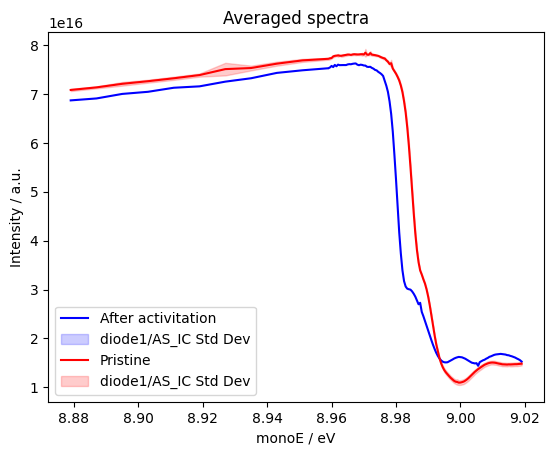

In [36]:
#### This is an example ########################

#change here the file you want to plot
file_to_plot ="S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/Data_Cu_K_EXAFS_merged_scans_4_7.csv"
# and the variables you want to plot
var1="diode1"
var2="AS_IC"

#################################################
result_df = pd.read_csv(file_to_plot)

plt.plot(result_df['monoE'], result_df[f'{var1}/{var2}_mean'], label="After activitation", color='blue')
plt.fill_between(result_df['monoE'],
                 result_df[f'{var1}/{var2}_mean'] - result_df[f'{var1}/{var2}_std'],
                 result_df[f'{var1}/{var2}_mean'] + result_df[f'{var1}/{var2}_std'],
                 color='blue', alpha=0.2, label=f'{var1}/{var2} Std Dev')

result_df = pd.read_csv("S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/Data_Cu_K_EXAFS_merged_scans_99_110.csv")

plt.plot(result_df['monoE'], result_df[f'{var1}/{var2}_mean'], label="Pristine", color='red')
plt.fill_between(result_df['monoE'],
                 result_df[f'{var1}/{var2}_mean'] - result_df[f'{var1}/{var2}_std'],
                 result_df[f'{var1}/{var2}_mean'] + result_df[f'{var1}/{var2}_std'],
                 color='red', alpha=0.2, label=f'{var1}/{var2} Std Dev')

plt.xlabel('monoE / eV')
plt.ylabel('Intensity / a.u.')
plt.title('Averaged spectra')
plt.legend()

plt.show()